<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220714_pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### numpy와 torch로 구현해보는 backward()/no_grad()

In [ ]:
# torch X, Numpy O

import numpy as np

# f = w * x

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0 # 시작은 0으로

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = fowrard pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 1 == 0: # 모든 epoch에 대해
        print(f'epoch {epoch+1}: w ={w:.3f}, loss = {l:.8f}')

print(f'Prediction after traning: f(5) = {forward(5):.3f}')


Prediction before traning: f(5) = 0.000
epoch 1: w =1.200, loss = 30.00000000
epoch 2: w =1.680, loss = 4.79999924
epoch 3: w =1.872, loss = 0.76800019
epoch 4: w =1.949, loss = 0.12288000
epoch 5: w =1.980, loss = 0.01966083
epoch 6: w =1.992, loss = 0.00314574
epoch 7: w =1.997, loss = 0.00050331
epoch 8: w =1.999, loss = 0.00008053
epoch 9: w =1.999, loss = 0.00001288
epoch 10: w =2.000, loss = 0.00000206
Prediction after traning: f(5) = 9.999


In [ ]:
# Numpy X pytorch O

import torch

# f = w * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) # 시작은 0으로

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# # gradient
# # MSE = 1/N * (w*x - y)**2
# # dJ/dw = 1/N 2x (w*x - y)
# def gradient(x, y, y_predicted):
#     return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = fowrard pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():
        # with 구문 안에서 새로 생성된 텐서(파라미터 w)들은 requires_grad=False 상태가 되어, 메모리 사용량을 아껴준다.
        # 파라미터 w의 gradient를 계산하지 않겠다
        w -= learning_rate * w.grad # lr * dl/dw
        # 위에서 새로 정의된 w의 grad가 아닌, 우항의 w.grad(전역변수 w의 grad)만 유효하다

    # zero gradients
    w.grad.zero_()  # w 갱신 후 dl/dw를 초기화(0) 해주자

    if epoch % 1 == 0: # 모든 epoch에 대해
        print(f'epoch {epoch+1}: w ={w:.3f}, loss = {l:.8f}')

print(f'Prediction after traning: f(5) = {forward(5):.3f}')


Prediction before traning: f(5) = 0.000
epoch 1: w =0.300, loss = 30.00000000
epoch 2: w =0.555, loss = 21.67499924
epoch 3: w =0.772, loss = 15.66018772
epoch 4: w =0.956, loss = 11.31448650
epoch 5: w =1.113, loss = 8.17471695
epoch 6: w =1.246, loss = 5.90623236
epoch 7: w =1.359, loss = 4.26725292
epoch 8: w =1.455, loss = 3.08308983
epoch 9: w =1.537, loss = 2.22753215
epoch 10: w =1.606, loss = 1.60939169
epoch 11: w =1.665, loss = 1.16278565
epoch 12: w =1.716, loss = 0.84011245
epoch 13: w =1.758, loss = 0.60698116
epoch 14: w =1.794, loss = 0.43854395
epoch 15: w =1.825, loss = 0.31684780
epoch 16: w =1.851, loss = 0.22892261
epoch 17: w =1.874, loss = 0.16539653
epoch 18: w =1.893, loss = 0.11949898
epoch 19: w =1.909, loss = 0.08633806
epoch 20: w =1.922, loss = 0.06237914
Prediction after traning: f(5) = 9.612


In [ ]:
# 한땀씩

import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss_1
y_predicted = w * x
loss = (y_predicted - y)**2
print('loss :', loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)   # -2

# learning_rate
lr = 0.01

# update parameter
with torch.no_grad():
    w -= lr * w.grad    # 1 → 1 - (-0.01)*(-2)

print(w)   # 1.02
print(f'before w.grad.zero_() :', w.grad) # -2
w.grad.zero_()
print(f'after w.grad.zero_() :', w.grad)  # 0
print('w :',w) # 1.02 : w.grad가 0가 된것, w는 갱신된 상태

# forward pass to compute loss_2
y_predicted = w * x
loss = (y_predicted - y)**2
print('loss :', loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# 1.순전파 : loss 계산

# 2.역전파 : loss.backward() 하면서 w.grad(=dLoss/dw) 계산됨

# 3.파라미터 업데이트(w.grad계산 꺼줌) : with torch.no_grad(): 

# 4.w.grad(dLoss/dw)를 0으로 초기화 : w.grad.zero_() , 갱신된 w를 통해서 새로운 y_predicted 및 loss가 계산되므로 역전파시 w.grad도 다시 계산되어야 하므로(0안하면 누적됨)

loss : tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)
tensor(1.0200, requires_grad=True)
before w.grad.zero_() : tensor(-2.)
after w.grad.zero_() : tensor(0.)
w : tensor(1.0200, requires_grad=True)
loss : tensor(0.9604, grad_fn=<PowBackward0>)
tensor(-1.9600)


In [ ]:
# optimizer 활용

# import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # torch.Size([4])
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # torch.Size([4])

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}') # 0 : w 초기값이 0이므로

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate)  # optimizer가 w, lr과 관련있어 w를 갱신하고, grad를 초기화할 수 있음
optimizer   # optimizer 출력 : 설정된 세팅이 나옴

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    with torch.no_grad():   # w 갱신시에는 w.grad계산 꺼주듯이 optimizer 갱신시에도? with torch.no_grad(): 구문 안해도 됨
        # update weights
        optimizer.step()
        # optimizer.grad : 출력 안됨

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:     # 10회 단위로 출력
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)


print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward0>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward0>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward0>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward0>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward0>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward0>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward0>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward0>)
epoch  

In [ ]:
# model 활용

import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
# 모델에 사용될 데이터는 2차원 이어야함
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) 
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) 

n_samples, n_features = X.shape # torch.Size([4, 1])
print(f'#samples: {n_samples}, #features: {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32) # X_test.shape : torch.Size([1]) 넘파이랑 다른 형식

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features # 1
output_size = n_features # 1

# we can call this model with samples X
model = nn.Linear(input_size, output_size) # 모델생성

'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') # 출력할때 마다 다른값
# model(X_test) : tensor([4.1130], grad_fn=<AddBackward0>)
# model(X_test).item() : 4.113


# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss() # 모델을 통해 나온값과 실제값의 차이를 MSE 방식으로 처리하겠다
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 모델의 파라미터(w, b)를 갱신/관리를 SGD 방식으로 하겠다
# list(model.parameters()) : [Parameter containing : tensor([[-0.0085]], requires_grad=True), Parameter containing : tensor([-0.9986], requires_grad=True)]

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step() # w, b 갱신

    # zero the gradients after updating
    optimizer.zero_grad() # dloss/dw, dloss/db 초기화(0)

    if epoch % 10 == 0:
        [w, b] = model.parameters() # 1)제너레이터를 변수에 나눠서 할당하거나, 2)list화 하거나
        print(f'epoch : {epoch+1},  w = {w[0].item():.3f},  b = {b[0].item():.3f},  loss = {l.item():.3f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = -4.418
epoch : 1,  w = -0.277,  b = -0.641,  loss = 67.125
epoch : 11,  w = 1.601,  b = -0.006,  loss = 1.739
epoch : 21,  w = 1.904,  b = 0.093,  loss = 0.047
epoch : 31,  w = 1.953,  b = 0.106,  loss = 0.003
epoch : 41,  w = 1.962,  b = 0.106,  loss = 0.002
epoch : 51,  w = 1.965,  b = 0.103,  loss = 0.002
epoch : 61,  w = 1.966,  b = 0.100,  loss = 0.002
epoch : 71,  w = 1.967,  b = 0.097,  loss = 0.002
epoch : 81,  w = 1.968,  b = 0.094,  loss = 0.001
epoch : 91,  w = 1.969,  b = 0.092,  loss = 0.001
Prediction after training: f(5) = 9.938


최초 w = 0.2147587537765503 최초 b = -0.14894592761993408
epoch: 10, loss = 4037.5198
epoch: 20, loss = 2845.4399
epoch: 30, loss = 2032.9360
epoch: 40, loss = 1479.0262
epoch: 50, loss = 1101.3278
epoch: 60, loss = 843.7301
epoch: 70, loss = 668.0078
epoch: 80, loss = 548.1138
epoch: 90, loss = 466.2950
epoch: 100, loss = 410.4490
최종 w = 63.88105010986328 최종 b = 0.3584216237068176


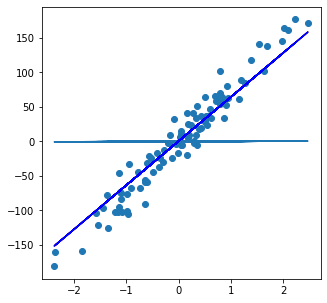

In [ ]:
# linear regression

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data : noise가 들어간 선형 데이터셋 생성
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Prepare data 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X_numpy, y_numpy)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)) # torch.Size([100])
y = y.view(y.shape[0], 1) # y.view(100, 1) : 1차원의 tensor [100]를 2차원 tensor로 [100, 1]

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

# 파라미터 확인
w, b = model.parameters()
print('최초 w =',w[0].item(), '최초 b =',b[0].item())
# 최초 파라미터 갱신전 plot
plt.plot(X, w[0].item()*X + b[0].item())

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step() # optimizer 내부로직에 의해 w, b가 갱신됨

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

print('최종 w =',w[0].item(), '최종 b =',b[0].item())
# 최종 파라미터 갱신후 plot(w, b를 이용해 그리는 방법)
plt.plot(X, w[0].item()*X + b[0].item())

# Plot
predicted = model(X).detach().numpy() # detach() : gradient가 전파되지 않는 텐서를 복사(= with torch.no_grad(): 와 같은 개념)

# 최종 파라미터 갱신후 plot(model(X))를 이용해 그리는 방법)
plt.plot(X_numpy, predicted, 'b') # numpy아닌 torch로도 그려짐
plt.show()

In [ ]:
# Data Loader

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):
    # Dataset 클래스를 상속받으면서, 1)__getitem__, 2)__len__ 재정의(오버라이딩)
    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('/content/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        # print('__getitem__ 메서드 호출됨')
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        # print('__len__ 메서드 호출됨')
        return self.n_samples


# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0] # class 매직메소드인 __getitem__이 호출됨
features, labels = first_data
print('-'*10, '첫번째 데이터셋', '-'*10)
print('features :',features, 'labels :',labels)

# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

# convert to an iterator and look at one random sample
dataiter = iter(train_loader) # train_loader를 출력하기위해
data = dataiter.next()
features, labels = data # train_loader를 features, labels로 반환할 수 있음
print('-'*10, 'train_loader(shuffled) sample(random batch)', '-'*10)
print(features, labels) # batch_size에 따라 4개의 데이터셋을 가짐

# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)    # class 매직메소드인 __len__이 호출됨
n_iterations = math.ceil(total_samples/4)   # total_samples(178)/batch_size(4)를 올림
print('전체 데이터 개수 :', total_samples, ', 전체 데이터를 학습하기 위한 batch의 반복횟수 :', n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader): # i는 iteration이 되겠고, inputs는 피처, labels는 타겟
        



        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

# # some famous datasets are available in torchvision.datasets
# # e.g. MNIST, Fashion-MNIST, CIFAR10, COCO

# train_dataset = torchvision.datasets.MNIST(root='./data', 
#                                            train=True, 
#                                            transform=torchvision.transforms.ToTensor(),  
#                                            download=True)

# train_loader = DataLoader(dataset=train_dataset, 
#                                            batch_size=3, 
#                                            shuffle=True)

# # look at one random sample
# dataiter = iter(train_loader)
# data = dataiter.next()
# inputs, targets = data
# print(inputs.shape, targets.shape)

---------- 첫번째 데이터셋 ----------
features : tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) labels : tensor([1.])
---------- train_loader(shuffled) sample(random batch) ----------
tensor([[1.3170e+01, 2.5900e+00, 2.3700e+00, 2.0000e+01, 1.2000e+02, 1.6500e+00,
         6.8000e-01, 5.3000e-01, 1.4600e+00, 9.3000e+00, 6.0000e-01, 1.6200e+00,
         8.4000e+02],
        [1.1840e+01, 8.9000e-01, 2.5800e+00, 1.8000e+01, 9.4000e+01, 2.2000e+00,
         2.2100e+00, 2.2000e-01, 2.3500e+00, 3.0500e+00, 7.9000e-01, 3.0800e+00,
         5.2000e+02],
        [1.1870e+01, 4.3100e+00, 2.3900e+00, 2.1000e+01, 8.2000e+01, 2.8600e+00,
         3.0300e+00, 2.1000e-01, 2.9100e+00, 2.8000e+00, 7.5000e-01, 3.6400e+00,
         3.8000e+02],
        [1.2340e+01, 2.4500e+00, 2.4600e+00, 2.1000e+01, 9.8000e+01, 2.5600e+00,
         2.1100e+00, 3.4000e-01, 1.3100e+00, 2.8000e+00,

In [ ]:
# logistic regression
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target   # X.shape : (569, 30), y.shape : (569,)

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # X_train으로 훈련하여 X_test에도 적용

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) # view() : 넘파이의 reshape()과 같다
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    # nn.Module을 상속받으면서, 1)forward 모듈 재정의(오버라이딩)
    def __init__(self, n_input_features):
        # super(Model, self).__init__()   # # nn.Module 상속
        super().__init__()   # # nn.Module 상속
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):   # nn.Module 클래스에 있는 forward 모듈을 재정의(오버라이딩) 해야함
    # 모델생성 후 self.forward() 하지 않아도 nn.Module의 영향으로 자동으로 호출되는 메서드
        y_pred = torch.sigmoid(self.linear(x))  # torch가 제공하는 sigmoid()
        return y_pred

model = Model(n_features)
# 파라미터 확인
w, b = model.parameters()
print('최초 w =',w[0], '최초 b =',b[0])

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss() # Binary Classification Entrophy 손실함수 : 마지막레이어의 노드가 1개인 이진분류에 주로 사용됨
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 옵티마이저에 모델의 파라미터(w, b), learning_rate 전달 

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train) # 모델에 훈련데이터 입력 → 예측값
    loss = criterion(y_pred, y_train) # 손실함수(예측값, 실제값) → 손실값
    # print(loss) # 1.0303 : 스칼라값

    # Backward pass and update
    loss.backward() # dloss/dw, dloss/db 계산됨
    optimizer.step() # optimizer 내부 로직에 의해 모델의 파라미터(w, b) 갱신됨

    # zero grad before new step
    optimizer.zero_grad() # dloss/dw, dloss/db 초기화(0)

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# 파라미터 확인
w, b = model.parameters()
print('최종 w =',w[0], '최종 b =',b[0])


# 1.훈련 데이터셋으로 훈련된(w, b 갱신완료) 모델로 테스트 데이터의 타깃값 예측
# 2.테스트 데이터의 타깃값(예측)과 실제 타깃값으로 정확도(accuracy) 확인
with torch.no_grad():   # backward() 메서드 사용안하는데? no_grad()해야함?, w,b갱신안하는데..
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    # a.eq(b).sum() : (a == b).sum(), 같으면 더해라
    print(f'accuracy: {acc.item():.4f}')

최초 w = tensor([ 0.0910,  0.1528, -0.0097, -0.1087,  0.1640, -0.0418,  0.1391, -0.0778,
         0.1572,  0.0684, -0.1288, -0.0026, -0.0783, -0.0323,  0.0541,  0.0213,
        -0.0852,  0.0509,  0.0051, -0.1218,  0.1501,  0.1401,  0.0224, -0.0314,
        -0.0089,  0.1126,  0.1565, -0.1366, -0.1356, -0.1757],
       grad_fn=<SelectBackward0>) 최초 b = tensor(0.0331, grad_fn=<SelectBackward0>)
epoch: 10, loss = 0.6047
epoch: 20, loss = 0.4946
epoch: 30, loss = 0.4255
epoch: 40, loss = 0.3779
epoch: 50, loss = 0.3431
epoch: 60, loss = 0.3162
epoch: 70, loss = 0.2948
epoch: 80, loss = 0.2772
epoch: 90, loss = 0.2625
epoch: 100, loss = 0.2499
최종 w = tensor([-0.0689,  0.0178, -0.1722, -0.2624,  0.0719, -0.1649, -0.0057, -0.2476,
         0.0860,  0.0870, -0.2402, -0.0120, -0.1873, -0.1463,  0.0592, -0.0098,
        -0.1007, -0.0106,  0.0311, -0.0991, -0.0228, -0.0079, -0.1511, -0.1931,
        -0.1316, -0.0133,  0.0162, -0.3128, -0.2325, -0.2409],
       grad_fn=<SelectBackward0>) 최종 b = tenso

In [ ]:
# softmax, crossentropy

import torch
import torch.nn as nn
import numpy as np

#
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1]) # 1차원
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # dim=0 : 행끼리의 합이 0이 되도록
print('softmax torch:', outputs)

x = torch.tensor([[2.0], [1.0], [0.1]]) # 2차원 : (3, 1)
outputs = torch.softmax(x, dim=0) # dim=0 : 행끼리의 합이 0이 되도록
print('softmax torch:', outputs)

# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):   # 손실함수 : 손실값을 반환
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])                     # 실제타깃값 : [1, 0, 0]
Y_pred_good = np.array([0.7, 0.2, 0.1])     # 좋은예측값 : [0.7, 0.2, 0.1]
Y_pred_bad = np.array([0.1, 0.3, 0.6])      # 나쁜예측값 : [0.1, 0.3, 0.6]
l1 = cross_entropy(Y, Y_pred_good)      # 좋은 예측값일때 loss
l2 = cross_entropy(Y, Y_pred_bad)       # 나쁜 예측값일때 loss
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0]) # 실제타깃값이 one-hot 인코딩된 값이 아님, 예측값의 인덱스와 매칭시킬예정

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # 예측값은 "행", 소프트맥스 적용X
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) # 예측값은 "행", 소프트맥스 적용X
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')


# get predictions
# print(torch.max(Y_pred_good, dim=1)) # torch.return_types.max(values=tensor([2.]), indices=tensor([0])) : 가장 큰 값 및 해당 인덱스
# dim=0 : 열을기준으로, dim=1 : 행을기준으로
_, predictions1 = torch.max(Y_pred_good, 1) # 가장 큰값의 인덱스만
_, predictions2 = torch.max(Y_pred_bad, 1)  # 가장 큰값의 인덱스만
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

# allows batch loss for multiple samples

# target is of size nBatch = 3(3Samples)
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

# get loss
l1 = loss(Y_pred_good, Y) # loss = nn.CrossEntropyLoss()
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions class(label/target)
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out) # 이진분류용 모델이므로 sigmoid 적용
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() # 이진분류용 손실함수(softmax적용 안함, 따라서 forward에서 sigmoid적용)

# # Multiclass problem
# class NeuralNet2(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NeuralNet2, self).__init__()
#         self.linear1 = nn.Linear(input_size, hidden_size) 
#         self.relu = nn.ReLU()
#         self.linear2 = nn.Linear(hidden_size, num_classes)  
    
#     def forward(self, x):
#         out = self.linear1(x)
#         out = self.relu(out)
#         out = self.linear2(out)
#         # no softmax at the end
#         return out

# model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
# criterion = nn.CrossEntropyLoss()  # (applies Softmax)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
softmax torch: tensor([[0.6590],
        [0.2424],
        [0.0986]])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


In [ ]:
# activation functions

# output = w*x + b
# output = activation_function(output)
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# softmax : 합이 1이 되는 비중을 같다록
# sofmax with torch
output = torch.softmax(x, dim=0)
print(output)
# sofmax with torch.nn
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid : 각각 0~1사이의 비중을 갖도록
# sigmoid with torch
output = torch.sigmoid(x)
print(output)
# sigmoid with torch.nn
s = nn.Sigmoid()
output = s(x)
print(output)

# #tanh
# output = torch.tanh(x)
# print(output)
# t = nn.Tanh()
# output = t(x)
# print(output)

# # relu
# output = torch.relu(x)
# print(output)
# relu = nn.ReLU()
# output = relu(x)
# print(output)

# # leaky relu
# output = F.leaky_relu(x)
# print(output)
# lrelu = nn.LeakyReLU()
# output = lrelu(x)
# print(output)

#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()        # nn.ReLU()라는 층을 만들어 사용
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  # nn.Sigmoid()라는 층을 만들어 사용
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        # relu 층을 만들지 않음
        self.linear2 = nn.Linear(hidden_size, 1)
        # sigmoid 층을 만들지 않음

    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])


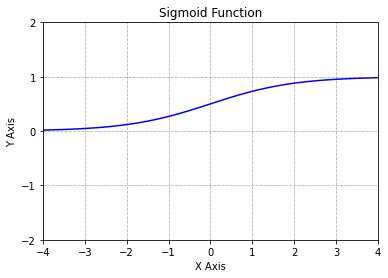

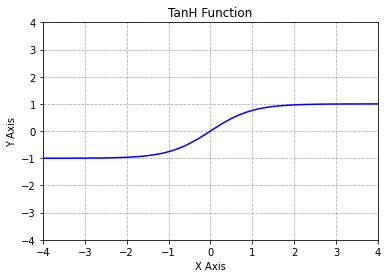

<Figure size 432x288 with 0 Axes>

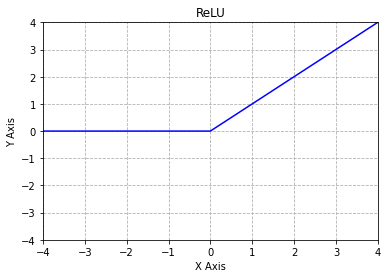

<Figure size 432x288 with 0 Axes>

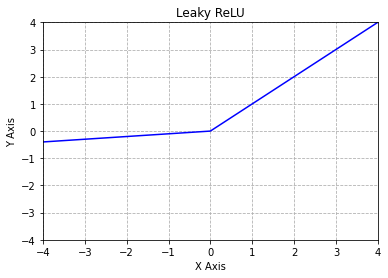

<Figure size 432x288 with 0 Axes>

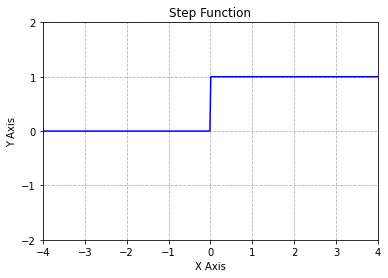

done


<Figure size 432x288 with 0 Axes>

In [ ]:
# plot_activations

import numpy as np 
import matplotlib.pyplot as plt

##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x)) # lambda함수를 바로 변수에 담아서 사용

x=np.linspace(-10,10,10) # -10부터 10까지 10개로 나눔
y=np.linspace(-10,10,100) # 잘게 나눌수록 그래프가 부드러워짐

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
# plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU
relu = lambda x: np.where(x>=0, x, 0) # np.where(조건, True일때 값, False일때 값)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
plt.savefig('step.png')

print('done')

cuda
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([100])


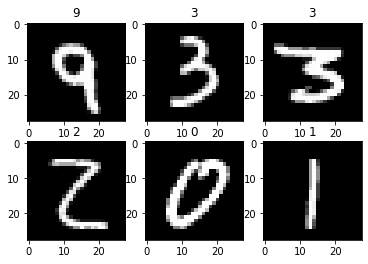

Epoch [1/2], Step [100/600], Loss: 0.3173
Epoch [1/2], Step [200/600], Loss: 0.1923
Epoch [1/2], Step [300/600], Loss: 0.3244
Epoch [1/2], Step [400/600], Loss: 0.2453
Epoch [1/2], Step [500/600], Loss: 0.0895
Epoch [1/2], Step [600/600], Loss: 0.2141
Epoch [2/2], Step [100/600], Loss: 0.1088
Epoch [2/2], Step [200/600], Loss: 0.0957
Epoch [2/2], Step [300/600], Loss: 0.1178
Epoch [2/2], Step [400/600], Loss: 0.0659
Epoch [2/2], Step [500/600], Loss: 0.0739
Epoch [2/2], Step [600/600], Loss: 0.1767
tensor([[-2.6450e+00, -6.7609e+00, -4.7396e-01,  2.5731e+00, -9.6557e+00,
         -3.0764e+00, -1.5011e+01,  8.9732e+00, -3.2017e+00, -1.3714e+00],
        [-4.0366e+00,  1.4426e+00,  9.3885e+00,  4.6319e+00, -1.4487e+01,
         -1.9990e+00, -3.3759e+00, -1.2685e+01, -2.0239e-01, -1.3845e+01],
        [-4.9216e+00,  4.5233e+00, -1.7245e+00, -2.7068e+00, -3.7521e+00,
         -3.4415e+00, -3.0459e+00, -9.7427e-01, -9.6370e-01, -4.2213e+00],
        [ 8.0952e+00, -9.0706e+00, -3.6785e+00, -

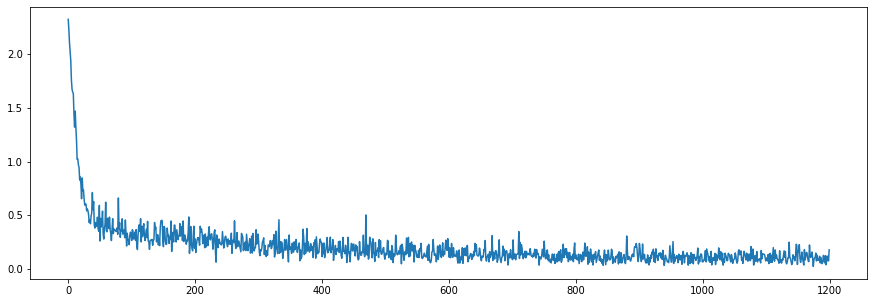

In [ ]:
# feedforward

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data',   # 저장 경로
                                           train=True,      # True : 훈련용 데이터 로드
                                           transform=transforms.ToTensor(),  # 이미지 파일을 텐서 형태로
                                           # 일반 이미지는 0-255사이의 값을 갖고, (H, W, C)의 형태를 갖는 반면 pytorch는 0-1사이의 값을 가지고 (C, H, W)의 형태를 갖는다
                                           download=True)   # 데이터셋이 없는경우 다운로드

test_dataset = torchvision.datasets.MNIST(root='./data',    
                                          train=False,      # False : 테스트용 데이터 로드
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


examples = iter(train_loader) # generator -> iter타입 변경
example_data, example_targets = examples.next() # 하나 까보자

print(example_data.shape) # torch.Size([100, 1, 28, 28])
print(example_data[0].shape) # torch.Size([1, 28, 28])
print(example_data[0][0].shape) # torch.Size([28, 28])

print(example_targets.shape) # torch.Size([100])

for i in range(6):
    plt.subplot(2,3,i+1)  # 함수형 방식
    plt.title(f'{example_targets[i]}')
    plt.imshow(example_data[i][0], cmap='gray')
    # train_loader에서 하나의 배치(100개데이터)를 가져와서 i번째 이미지의 0번째 차원인 흑백이미지(28X28)
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()   # 층을 만들어 사용하는 방식
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

# 학습전 모델(입력사이즈, 은닉층크기, 출력층 설정)
model = NeuralNet(input_size, hidden_size, num_classes).to(device) # 모델을 to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # 옵티마이저에 모델의 파라미터(w,b), lr 전달

# Train the model
loss_list = []
n_total_steps = len(train_loader) # 전체 데이터가 배치사이즈 몇번으로 나뉘는지 
for epoch in range(num_epochs):     # 전체 데이터를 몇번 반복 할지
    for i, (images, labels) in enumerate(train_loader):  
        # images : [100, 1, 28, 28]
        # images(resized) : [100, 784], 100개의 이미지(각 784픽셀)
        images = images.reshape(-1, 28*28).to(device) # 100개의 이미지 device 전달
        labels = labels.to(device) # 100개의 레이블 device 전달
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.cpu().data) # loss(CUDA Tensor)를 loss(CPU Numpy)로 변환해서 사용
        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# loss 변화 plot
fig = plt.figure(figsize=(15, 5))
plt.plot(range(n_total_steps * num_epochs), loss_list)

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# 테스트데이터로 예측값 확인할때는 backward(역전파)하면서 가중치를 수정하는것이 아니기 때문에 gradients계산 필요X
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:  # enumerate 사용X : i를 이용해 epoch/step별로 loss확인할 필요 없으므로
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        print(outputs.data)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        break   # test_loader의 batch 한개만 살펴보자
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# 테스트데이터로 예측값 확인할때는 backward(역전파)하면서 가중치를 수정하는것이 아니기 때문에 gradients계산 필요X
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:  # enumerate 사용X : i를 이용해 epoch/step별로 loss확인할 필요 없으므로
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # print(outputs.data.shape) # [100, 10] : 하나의배치(100개)데이터 각각 10개의 확률을 가짐
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, dim=1) # 10개의 확률중 가장 큰 값의 인덱스
        n_samples += labels.size(0) # size(0) : shape에서 0차원의 정수값
        # print((predicted == labels).sum())
        n_correct += (predicted == labels).sum().item() # tensor(100, device='cuda:0')에서 값만 가져오기
        # break   # test_loader의 batch 한개만 살펴보자
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.04 %


Files already downloaded and verified
Files already downloaded and verified
tensor(4)


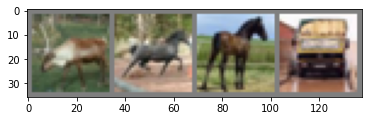

torch.Size([4, 3, 32, 32])
Epoch [1/2], Step [2000/12500], Loss: 2.2985
Epoch [1/2], Step [4000/12500], Loss: 2.2720
Epoch [1/2], Step [6000/12500], Loss: 2.2874
Epoch [1/2], Step [8000/12500], Loss: 2.3206
Epoch [1/2], Step [10000/12500], Loss: 2.3105
Epoch [1/2], Step [12000/12500], Loss: 2.2935
Epoch [2/2], Step [2000/12500], Loss: 2.1553
Epoch [2/2], Step [4000/12500], Loss: 1.8437
Epoch [2/2], Step [6000/12500], Loss: 1.6710
Epoch [2/2], Step [8000/12500], Loss: 1.7504
Epoch [2/2], Step [10000/12500], Loss: 1.3648
Epoch [2/2], Step [12000/12500], Loss: 2.4177
Finished Training
Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Accuracy of the network: 32.58 %
Accuracy of plane: 55.3 %
Ac

In [ ]:
# cnn

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 2
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), # (H, W, C), (0~255) → [C, H, W], (0~1)
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
     # Normalize((meanR, meanG, meanB), (stdR, stdG, stdB))
     # 3채널 각각의 (X-mean)/std로 계산하는 정규화

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize : img를 불러올때 transform을 통해서 정규화 되어있으므로
    npimg = img.numpy()  # img를 불러올때 transform을 통해서  ToTensor()되어 있으므로
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # Tensor에서 [channel, width, height] 였으므로 matplotlib용으로 전치할 인덱스 순서(width, height, channel)
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# images.shape : [4, 3, 32, 32] batch, channel, width, height
# labels.shape : [4]
print(labels[0])

# show images
imshow(torchvision.utils.make_grid(images))
# make_grid : grid를 포함한 tensor반환(batch단위로 이미지를 출력할 때)

print(images.shape)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__() # super().__init__() 과 똑같음
        self.conv1 = nn.Conv2d(3, 6, 5) # in_channels, out_channels, kernel_size : 깊이가(채널) 3인(R,G,B) 이미지에 깊이가 6인(6종류의 필터) 도장을 찍겠다
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) # 깊이(채널)가 6인 이미지에 깊이가 16인(16종류 필터) 도장을 찍겠다
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 입력값, 출력값
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n(배치), 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10 : 각배치는 끝까지 하나의 데이터처럼로 따라다님
        # 마지막 레이어에서 softmax 하지 않아도 된다 : 손실함수 CrossEntropyLoss() 는 softmax와 cross-entropy를 적용하기 때문
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images) # outputs.shape : [배치사이즈(4) x class(10)]
        loss = criterion(outputs, labels) # outputs는 확률, labels는 1차원이며 인덱스값(0~9)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

# # 모델과 옵티마이저의 state_dict에 접근하기
# print("Model's state_dict:")
# for param_tensor in model.state_dict():
#     print(param_tensor, "\t", model.state_dict()[param_tensor].size())
# # state_dict() : 모델 학습할때 각 layer마다 매개변수(w, b)를 dict()형태로 저장한 객체

PATH = './cnn.pth'    # pytorch 모델 저장시 : .pt, .pth 일반적
torch.save(model.state_dict(), PATH)

# test데이터로 예측
with torch.no_grad():
    # 초기화
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, dim=1) # torch.max() → 최대값, 인덱스
        n_samples += labels.size(0) # labels.size(0) : 배치개수만큼 레이블이 있고, 그 개수를 가져옴
        n_correct += (predicted == labels).sum().item() # : 최대값의 인덱스와, 타깃값이 같으면 더해서 값만 가져옴

        # 하나의 배치[4]안에서 내부를 순회
        for i in range(batch_size):
            # 배치내부를 순회하며 예측값과 타깃값의 일치여부 확인하여 [0,0,+=1,...,0]
            label = labels[i] # 4개묶음으로 가져온 배치의 i번째 레이블(인덱스)는?
            pred = predicted[i] # 4개묶음으로 출력된 배치의 i번째 예측값(인덱스)은?
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    # 모델의 예측 정확도 확인
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    # class각각의 정확도 확인
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

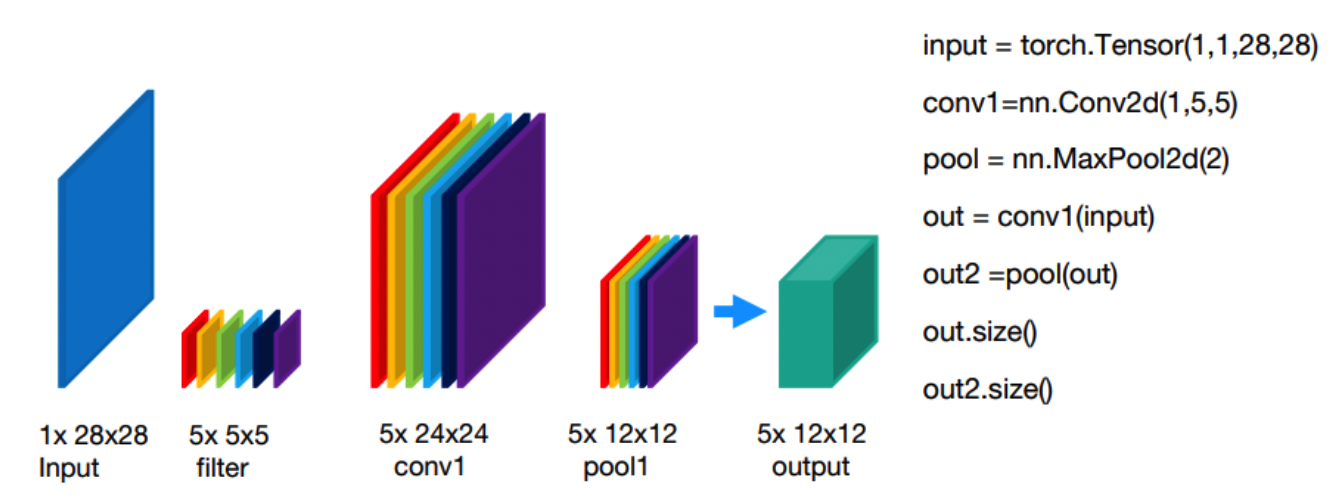

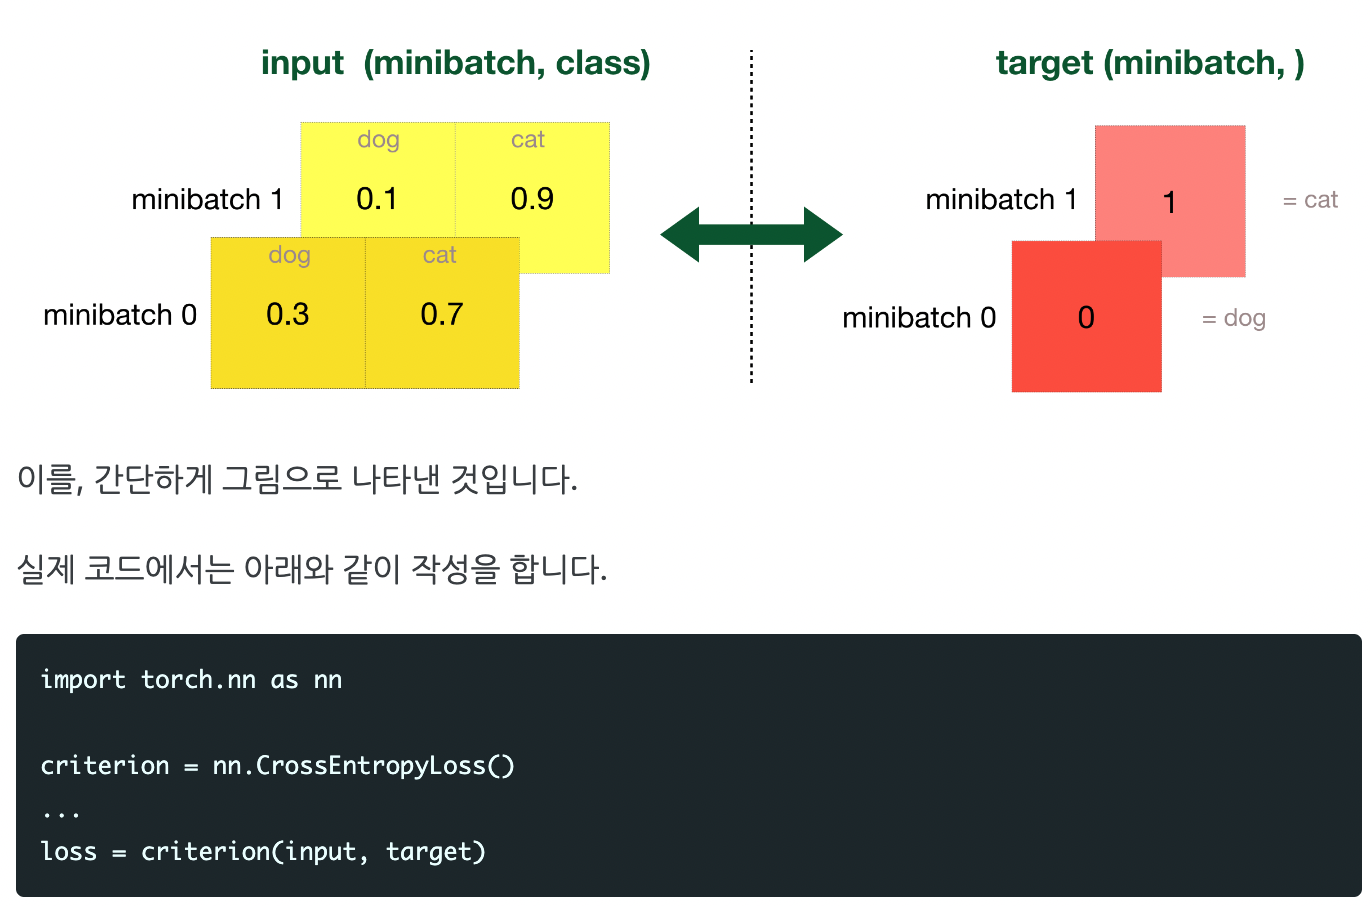

In [ ]:
# test데이터로 예측
with torch.no_grad():
    # 초기화
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, dim=1) # torch.max() → 최대값, 인덱스
        n_samples += labels.size(0) # labels.size(0) : 4, 배치개수만큼 레이블이 있고, 그 개수를 가져옴
        n_correct += (predicted == labels).sum().item() # : 최대값의 인덱스와, 타깃값이 같으면 더해서 값만 가져옴
          
        # 하나의 배치[4]안에서 내부를 순회
        for i in range(batch_size):
            # 배치내부를 순회하며 예측값과 타깃값의 일치여부 확인하여 [0,0,+=1,...,0]
            label = labels[i] # 4개묶음으로 가져온 배치의 i번째 레이블(인덱스)는?
            pred = predicted[i] # 4개묶음으로 출력된 배치의 i번째 예측값(인덱스)은?
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

            print(label)
            print(pred)
            break
        break

    # # 모델의 예측 정확도 확인
    # acc = 100.0 * n_correct / n_samples
    # print(f'Accuracy of the network: {acc} %')

    # # class각각의 정확도 확인
    # for i in range(10):
    #     acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    #     print(f'Accuracy of {classes[i]}: {acc} %')

tensor(3, device='cuda:0')
tensor(3, device='cuda:0')


['ants', 'bees']


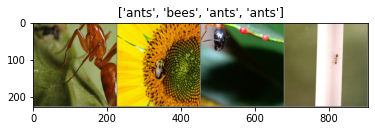

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 0.6961 Acc: 0.5984
val Loss: 0.4830 Acc: 0.8105

Epoch 1/24
----------
train Loss: 0.5215 Acc: 0.7664
val Loss: 0.3241 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.4348 Acc: 0.8279
val Loss: 0.2633 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.3879 Acc: 0.8320
val Loss: 0.2268 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.4108 Acc: 0.8197
val Loss: 0.2031 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.3559 Acc: 0.8525
val Loss: 0.2125 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.3961 Acc: 0.8443
val Loss: 0.1963 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3769 Acc: 0.8320
val Loss: 0.1957 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.3170 Acc: 0.8689
val Loss: 0.2030 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.3845 Acc: 0.8074
val Loss: 0.1905 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3897 Acc: 0.8279
val Loss: 0.1934 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3666 Acc: 0.8361
val Loss: 0.2028 Acc: 0.9216

Ep

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

from zipfile import ZipFile
# train/value 이미지 데이터 압축 풀기 -> /content/
with ZipFile('/content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/hymenoptera_data.zip') as zipper:
    zipper.extractall() # '/content/' 폴더에 압축풀림(default)


# mean : 평균,std : 표준편차,var : 분산
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

# 훈련/검증 데이터의 이미지처리방식을 Dict 형태로 정의
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}
# data_transforms['train'] : data_transforms 딕셔너리에서 'train'이라는 key의 value에 접근할 수 있음

data_dir = '/content/hymenoptera_data'

# Dictionary Comprehension 사용
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),    # .datasets.ImageFolder(폴더경로, transform=) : 폴더경로로 dataset형태를 만들어줌
                                          data_transforms[x])
                  for x in ['train', 'val']}
# ImageFolder를 통해 dataset 객체 생성시, 지정된 폴더 하부의 폴더명을 타깃값(레이블)로 지정하여 .classes로 접근가능

# image_datasets의 key/value를 dataloasers에서 다시 활용하기 위해 Dict Comprehension사용
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']} # {'train': 244, 'val': 153}
class_names = image_datasets['train'].classes

image_datasets['train'] # ImageFolder 클래스로 생성된 데이터셋 인스턴스(객체)
image_datasets['train'].classes # ImageFolder 클래스로 생성된 데이터셋 인스턴스(객체)에서 classes로 하부 폴더명(타깃값)에 접근

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names) # ['ants', 'bees']


def imshow(inp, title):
    """Imshow for Tensor."""
    # ToTensor()로 텐서화된 이미지를 matplotlib에서 사용가능한 형태로 변경
    ## 1. numpy()
    ### 2. transpose((1, 2, 0))
    #### 3. std 곱하고 평균을 더하고
    ##### 4. 0~1사이 값으로 자르기
    # print(inp.shape) # torch.Size([3, 228, 906])
    inp = inp.numpy().transpose((1, 2, 0)) # (228, 906, 3)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train'])) # 하나만 샘플로 보기위해
# inputs.shape : [4, 3, 224, 224]
# classes : [1, 0, 0, 1] # DataLoader 클래스를 통해 불러온 타깃값은 인덱스화 되어있음

# Make a grid from batch
out = torchvision.utils.make_grid(inputs) # batch(4개이미지)를 하나의 이미지로
# out.shape : [3, 228, 906]

imshow(out, title=[class_names[x] for x in classes])
# DataLoader를 통해 생성한 객체의 타깃값은 인덱스로 나타나 있음

def train_model(model, criterion, optimizer, scheduler, num_epochs=25): # scheduler : 다양한 종류의 learning_rate를 지정하며, epoch마다의 step이 점점 좁아지도록 함
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) # deepcopy() : 원본에 영향을 주지않는 복제버전 생성
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # 각 에포크 마다 train(훈련) -> val(검증) 진행
        # Each epoch has a training and validation phase : train, val 단계 각각 다른 모드를 설정
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode (= model.train(False))

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'): # set_grad_enabled(False) = no_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1) # 최대값, 인덱스
                    # preds : tensor([0, 1, 1, 0]) 

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0) # 손실값 x 배치크기(4)
                running_corrects += torch.sum(preds == labels.data) # 예측이 실제값과 맞는 개수
            
            if phase == 'train':
                scheduler.step() # 학습할 때 batch마다 optimizer.step() 하고 epoch마다 scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase] # 금번의 epoch에서 전체손실값/전체데이터크기
            epoch_acc = running_corrects.double() / dataset_sizes[phase] # double() : tensor의 자료형 변환(64-bit floating point)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc: # 금번 에포크의 epoch_acc vs 직전 에포크에서 업데이트 된 best_acc
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
    
    # 모든 에포크(25) 종료
    time_elapsed = time.time() - since # 소요된 시간
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts) # 모델에 최고의 가중치를 불러옴
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.
# 이미 학습된 모델에 추가 데이터를 투입하여 파라미터를 업데이트하는 방법
# final fully connected layer만 수정하는 것은 사실 진정한 의미의 전이학습은 아님(가진데이터가 작기때문에 어쩔수 없음)

model = models.resnet18(pretrained=True) # resnet18의 경우 최종 layer가 fc 이고 입력이 512-d 출력이 1000-d
# models.resnet18() 함수내부에서 model.load_state_dict 이 수행되어 parameter가 copy된 모델이 return됨
num_ftrs = model.fc.in_features # fc.in_features : 입력 채널 수(=512)
# # Here the size of each output sample is set to 2. : 출력 채널 수(=2)
# # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)). : nn.Linear(입력512, 출력2) 
model.fc = nn.Linear(num_ftrs, 2) # model.fc로 기존 fc(512->1000) 변경가능(512->2)

model = model.to(device)

criterion = nn.CrossEntropyLoss() # 사용될 손실함수 정의

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# +++Learning rate scheduling should be applied after optimizer’s update+++
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#         for batch in dataloader
#         foward(...)
#         backward(...)
#             optimizer.step()  <----- 배치마다
#     scheduler.step()  <------ 에포크마다
#     validate(...)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) # lr이 설정되어있는 optimizer를 파라미터로 받음
# optimizer에 설정된 lr(0.001)에 step_size(7epoch) 마다 gamma(0.1)를 곱해주는 방식

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


# #### ConvNet as fixed feature extractor ####
# # Here, we need to freeze all the network except the final layer.
# # We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
# model_conv = torchvision.models.resnet18(pretrained=True)
# for param in model_conv.parameters():
#     param.requires_grad = False

# # Parameters of newly constructed modules have requires_grad=True by default
# num_ftrs = model_conv.fc.in_features
# model_conv.fc = nn.Linear(num_ftrs, 2)

# model_conv = model_conv.to(device)

# criterion = nn.CrossEntropyLoss()

# # Observe that only parameters of final layer are being optimized as
# # opposed to before.
# optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# model_conv = train_model(model_conv, criterion, optimizer_conv,
#                          exp_lr_scheduler, num_epochs=25)